In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Tạo dữ liệu sin
def create_sine_data(n_points=1000, seq_len=10):
    x = np.linspace(0, 40, n_points)
    y = np.sin(x)
    
    X, Y = [], []
    for i in range(len(y) - seq_len):
        X.append(y[i:i+seq_len])
        Y.append(y[i+seq_len])
    
    X = np.array(X)[:, :, np.newaxis]         
    Y = np.array(Y)[:, np.newaxis]
    
    return (torch.FloatTensor(X[:-200]), torch.FloatTensor(Y[:-200]),
            torch.FloatTensor(X[-200:]),  torch.FloatTensor(Y[-200:]))

X_train, y_train, X_test, y_test = create_sine_data()

In [ ]:
#  Model RNN đơn giản
class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, output_size=1):
        super().__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, hn = self.rnn(x)            
        out = self.fc(out[:, -1, :])       
        return out

In [ ]:
#  Huấn luyện 
model = SimpleRNN(hidden_size=64)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

epochs = 500
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    pred = model(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

Epoch 100/500, Loss: 0.000091
Epoch 200/500, Loss: 0.000049
Epoch 300/500, Loss: 0.000021
Epoch 400/500, Loss: 0.000004
Epoch 500/500, Loss: 0.000002


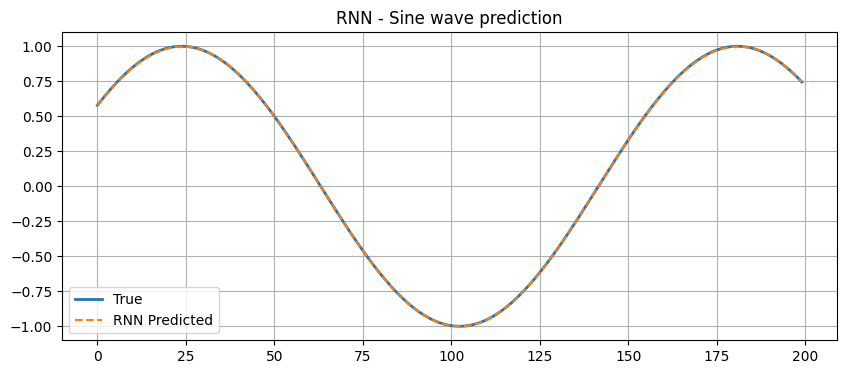

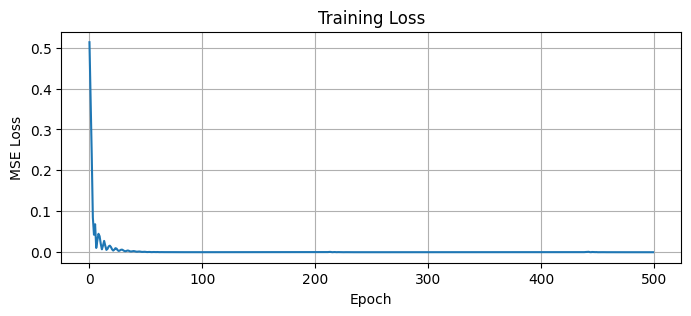

In [ ]:
#  Dự đoán và vẽ 
model.eval()
with torch.no_grad():
    pred_test = model(X_test).numpy()

plt.figure(figsize=(10, 4))
plt.plot(y_test.numpy(), label='True', linewidth=2)
plt.plot(pred_test, label='RNN Predicted', linestyle='--')
plt.title("RNN - Sine wave prediction")
plt.legend()
plt.grid(True)
plt.show()

# Vẽ loss
plt.figure(figsize=(8, 3))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()